<a href="https://colab.research.google.com/github/kokovariax/kokoRepo/blob/master/equation_tracking_symbolic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Symbolic Regression**

### 4.1 Importing libraries

In [ ]:
!pip install gplearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sympy import *
from sklearn.utils.random import check_random_state
import graphviz
import time

### 4.2 Initial dataset and data analysis

Initial dataset:

In [ ]:
nsample = 1000
sig = 0.2

In [ ]:
def Lw(Dc):
    L_p = 40  # Example value for L_p
    h_t = 90   # Example value for h_t
    return L_p + 10 * np.log10(2 * np.pi * (h_t**2 + Dc**2)) + (0.005 * np.sqrt(h_t**2 + Dc**2))

In [ ]:
rng = check_random_state(0)
Dc = rng.uniform(100, 1000, nsample)
Lt = Lw(Dc) + sig*np.random.normal(size=nsample)

In [ ]:
data = np.array([Dc, Lt]).T
columns = ['Dc', 'Lt']
df = pd.DataFrame(data = data, columns = columns)
df.head()

,Dc,Lt
0,593.932154,106.382209
1,743.670430,109.097119
2,642.487038,107.295649
3,590.394865,106.392511
4,481.289319,104.215250


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Dc'].plot(kind='hist', bins=20, title='Dc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Lt'].plot(kind='hist', bins=20, title='Lt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Dc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Dc', y='Lt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Dc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Dc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Lt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Lt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Dc'].plot(kind='line', figsize=(8, 4), title='Dc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Lt'].plot(kind='line', figsize=(8, 4), title='Lt')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


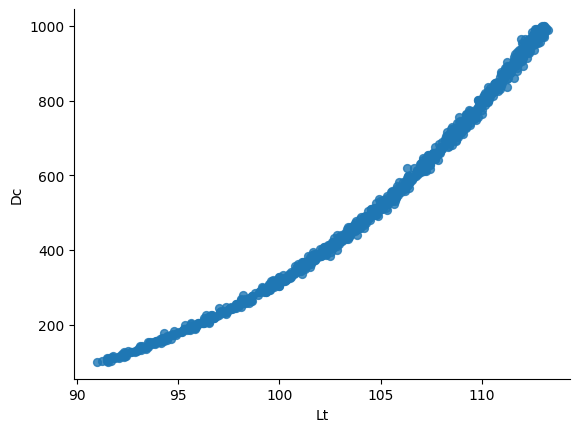

In [ ]:
# @title Dc vs Lt

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Lt', y='Dc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Data visualization:

### 4.3 ML getting data:

In [ ]:
X = df[['Lt']]
y = df['Dc']
y_true = y
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 1), (300, 1), (700,), (300,))

### 4.4 GPlearn implementation

#### 4.4.1 First test:

a) Choosing just some functions

In [ ]:
function_set = ['add', 'sub', 'mul','log','cos','sin']

In [ ]:
est_gp = SymbolicRegressor(population_size=5000,function_set=function_set,
                           generations=40, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)

b) Fit:

In [ ]:
t0 = time.time()
est_gp.fit(X_train, y_train)
print('Time to fit:', time.time() - t0, 'seconds')

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    16.04           295124       66          200.169          250.983      7.72m
   1    18.96          60041.2       54          168.894          189.947      8.73m
   2    25.24          15242.2       58          168.215            185.9      7.58m
   3    27.00          91985.9       33          164.545          190.708      3.61m
   4    37.19           633796       74          115.157          101.553      4.30m
   5    56.93      4.85768e+06      126          100.017           95.136      4.80m
   6    62.04      1.18988e+06      134           77.875          84.6707      5.17m
   7    80.07           669673       97          32.8696          37.7755      6.10m
   8    90.62           164126       96          31.0653          32.0302  

c) Prediction

In [ ]:
t0 = time.time()
y_gp1 = est_gp.predict(X_test)
print('Time to predict:', time.time() - t0, 'seconds')

Time to predict: 0.0041408538818359375 seconds


d) Score

In [ ]:
score_gp1 = est_gp.score(X_test, y_test)
print('R2:', score_gp1)

R2: 0.9983602524874564


##### 4.4.1.1. **Visualizing the symbolic function**

a) Equation

In [ ]:
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
}

In [ ]:
next_e = sympify(str(est_gp._program), locals=converter)
next_e

0.0720000000000001*X0*(X0 - 0.54) - 1.732252*X0 + (0.0720000000000001*X0*(X0 + 0.54) - 0.07082341344*X0 - (0.099 - X0)*cos(0.044*X0) + 0.00348192*(X0 - 0.54)*(2*X0 + 0.526) + 0.09672*(0.18*X0*(X0 - 0.54) + 0.382)*cos(0.044*X0) - 0.09672*sin(X0) + 0.33755784206944)*cos(0.044*X0) - log(X0) - log(X0 + 0.526) + log(cos(0.044*X0)) - 0.551472948

b) Score

In [ ]:
y_gp = est_gp.predict(X_test)
score_gp1 = est_gp.score(X_test, y_test)
score_gp1

0.9983602524874564

c) Plot

Text(0.5, 0, 'Turbine Sound Power')

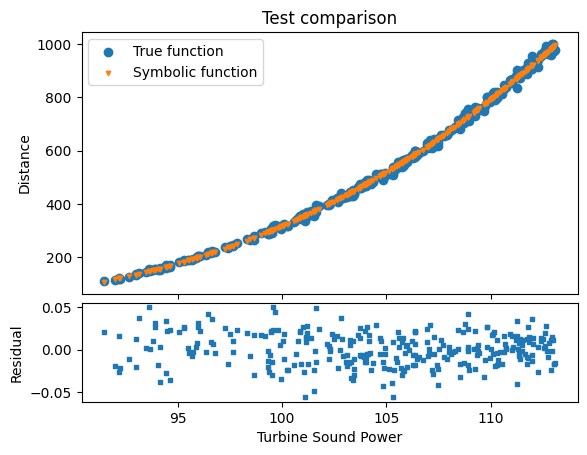

In [ ]:
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax1 = fig.add_subplot(gs[0:5,0])
plt.title('Test comparison')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_gp1, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('Distance')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_gp1/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('Turbine Sound Power')

d) Tree

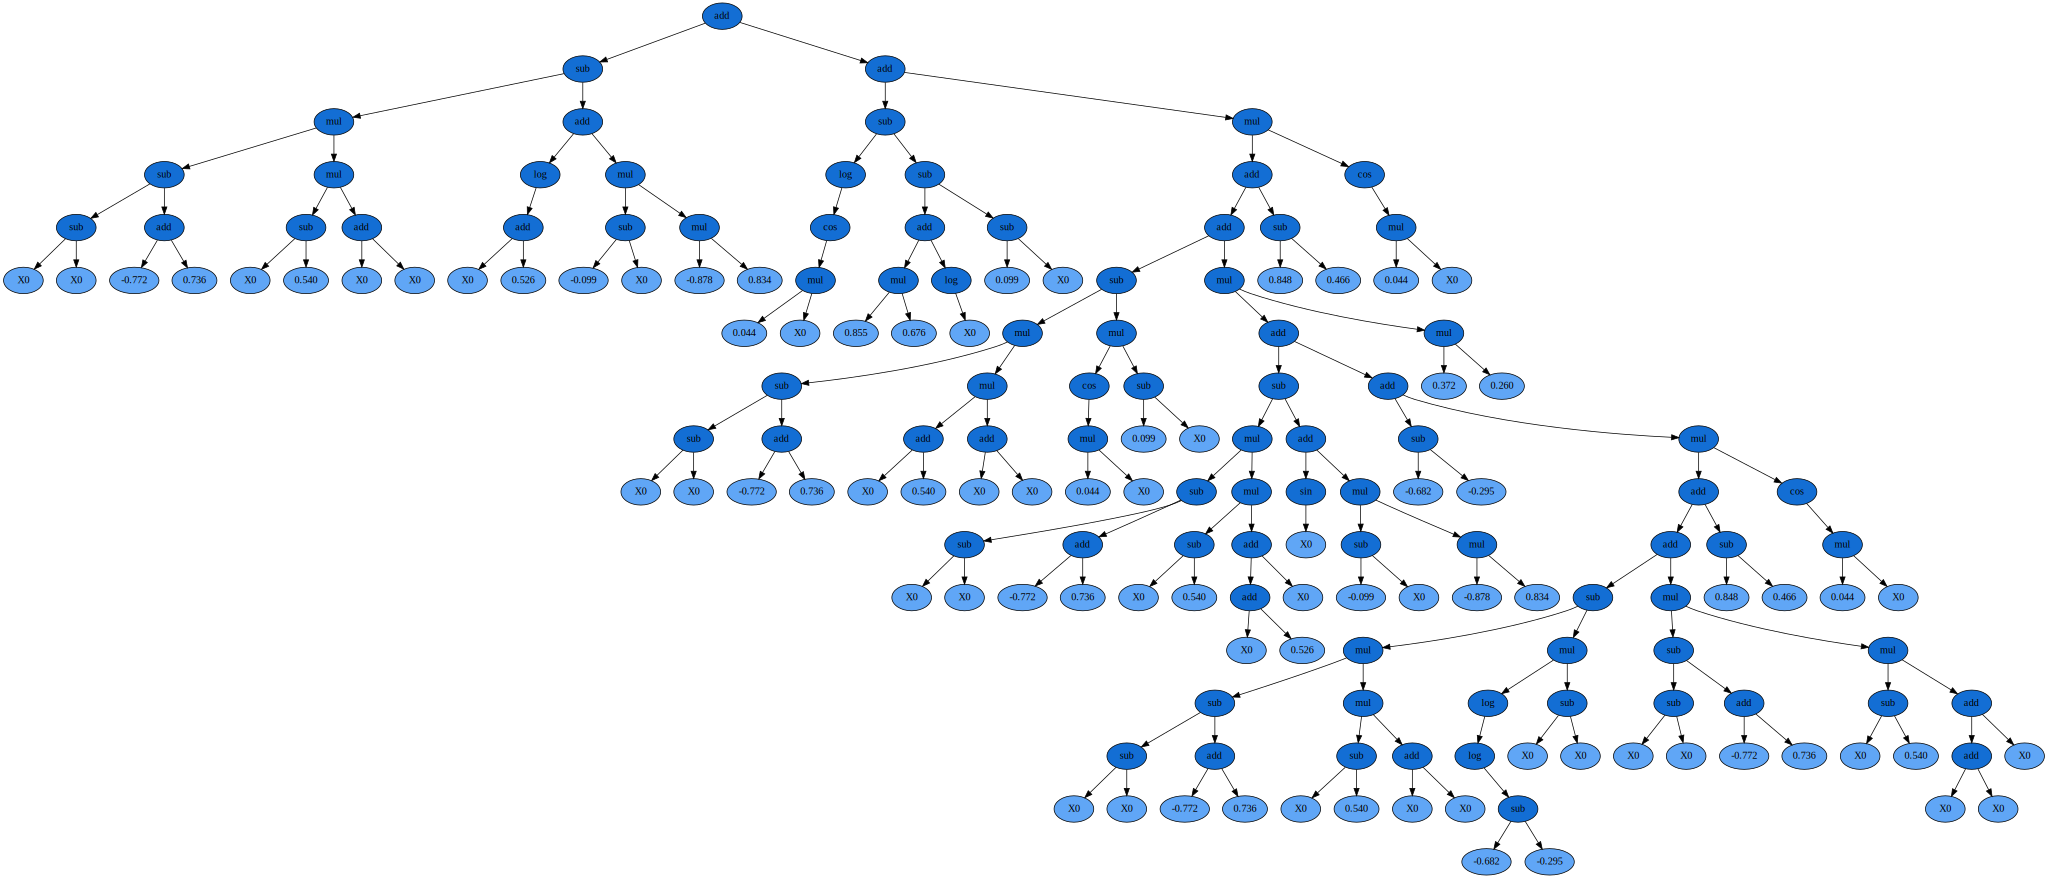

In [ ]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1', format='png', cleanup=True)
graph

#### 4.4.2 Second test:

a) Don't imposing any function

In [ ]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)

b) Fit

In [ ]:
t0 = time.time()
est_gp.fit(X_train, y_train)
print('Time to fit:', time.time() - t0, 'seconds')

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    48.81      8.52241e+15       31          178.587          176.079      5.49m
   1    35.89      1.44673e+06      127          167.094          146.856      4.88m
   2    58.26      7.55176e+13      127          159.622          169.186      2.40m
   3    77.94      2.07507e+09      127          119.287          124.611      2.77m
   4    79.81      4.21719e+08      125          120.157          132.514      2.51m
   5   114.77      1.38739e+07      127           109.75          103.729      3.03m
   6   130.68      3.35583e+12      119          104.325          103.097      3.21m
   7   134.71      1.11187e+12      181          84.4247          95.0787      2.82m
   8   136.53      1.10583e+12      181          68.5256          60.1965  

c) Prediction

In [ ]:
t0 = time.time()
y_gp2 = est_gp.predict(X_test)
print('Time to predict:', time.time() - t0, 'seconds')

Time to predict: 0.006814002990722656 seconds


d) Score

In [ ]:
score_gp2 = est_gp.score(X_test, y_test)
print('R2:', score_gp2)

R2: 0.9857463519752963


##### 4.4.2.1 **Visualizing the symbolic function**

a) Equation

In [ ]:
next_e = sympify(str(est_gp._program), locals=converter)
next_e

-(8.54700854700855*X0 + 4.85470085470086)*(X0**2/(X0 - 0.647) + 0.862*X0 + 0.395)/(0.874*X0*(-0.305167 - 0.663/X0) + (-X0 - 0.604)/(-0.305167 - 0.663/X0)) + 0.000207882347076548*(-X0 - 0.042)**2*(X0 - 0.946)**2*(0.416025*(X0 + 0.328682170542636)**2)*(0.085*X0**2 + X0 - 2.30193650793651 - 0.044619*(2.484*X0 + 0.945/X0)/(X0*(-2*X0 - 1.57868304278922 - 0.297/X0)))/(X0**2*(X0 + 0.914)**2)

b) Plot

Text(0.5, 0, 'D_c')

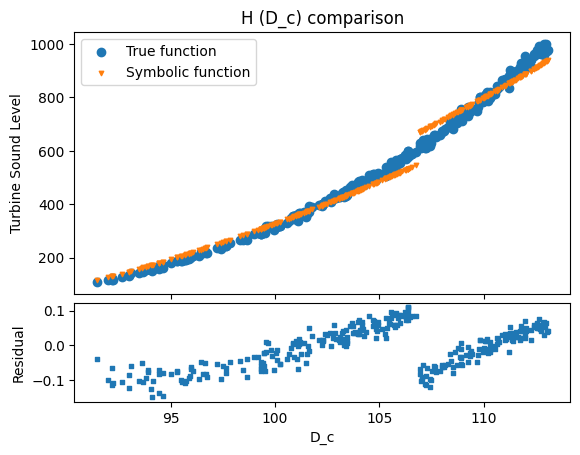

In [ ]:
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax1 = fig.add_subplot(gs[0:5,0])
plt.title('H (D_c) comparison')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_gp2, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('Turbine Sound Level')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_gp2/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('D_c')

c) Tree

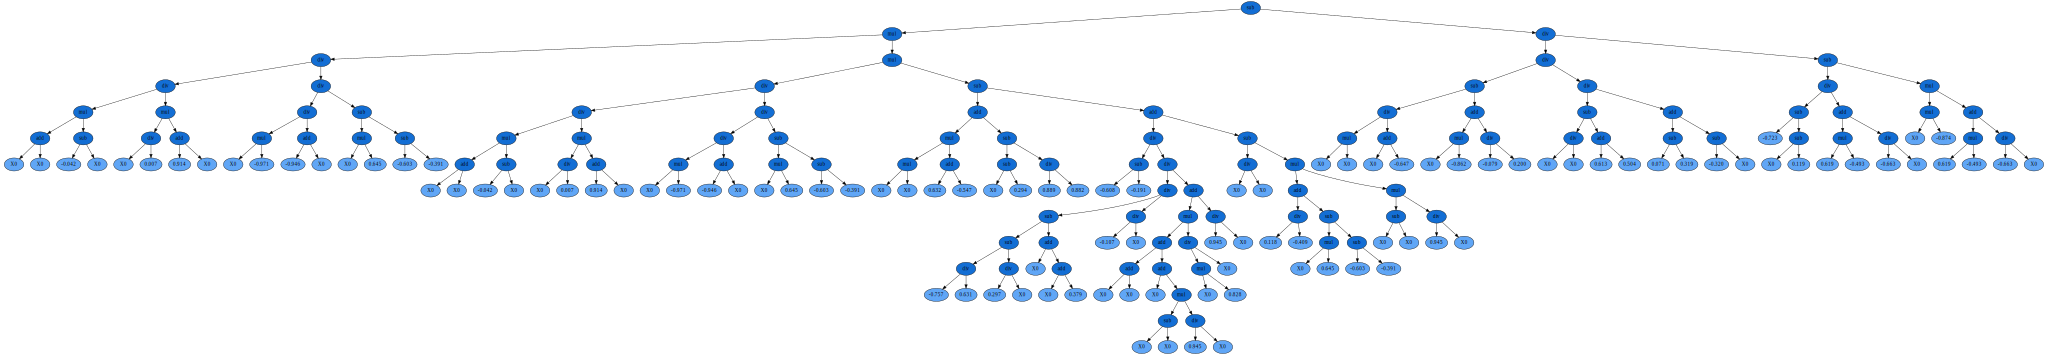

In [ ]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex2', format='png', cleanup=True)
graph

### 4.5 Comparing GPlearn to traditional ML approaches

#### 4.5.1 Decision Tree Regressor

a) Model and fit

In [ ]:
est_tree = DecisionTreeRegressor(max_depth=5)
t0 = time.time()
est_tree.fit(X_train, y_train)
print('Time to fit:', time.time() - t0, 'seconds')

Time to fit: 0.004815101623535156 seconds


b) Prediction and score

In [ ]:
t0 = time.time()
y_tree = est_tree.predict(X_test)
print('Time to predict:', time.time() - t0, 'seconds')

Time to predict: 0.005401611328125 seconds


In [ ]:
#Score
score_tree = est_tree.score(X_test, y_test)
print('DT:', score_tree)

DT: 0.9971088171211464


c) Plot

Text(0.5, 0, 'D_c')

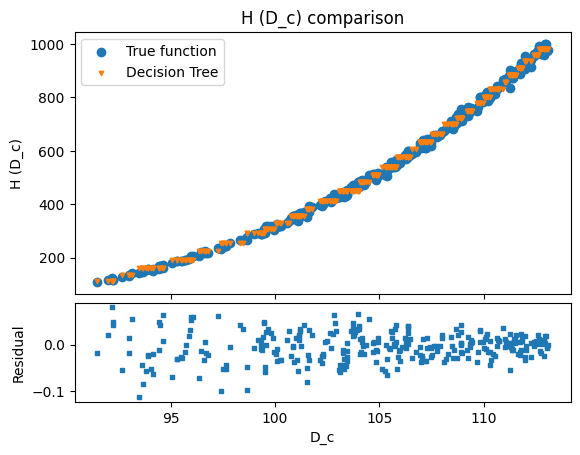

In [ ]:
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax1 = fig.add_subplot(gs[0:5,0])
plt.title('H (D_c) comparison')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_tree, marker = 'v', s = 10, label = 'Decision Tree')
plt.legend()
plt.ylabel('H (D_c)')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_tree/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('D_c')

#### 4.5.2 Random Forest Regressor

a) Model and Fit

In [ ]:
est_rf = RandomForestRegressor(n_estimators=100,max_depth=5)
t0 = time.time()
est_rf.fit(X_train, y_train)
print('Time to fit:', time.time() - t0, 'seconds')

Time to fit: 0.19230151176452637 seconds


b) Prediction and Score

In [ ]:
t0 = time.time()
y_rf = est_rf.predict(X_test)
print('Time to predict:', time.time() - t0, 'seconds')

Time to predict: 0.011875152587890625 seconds


In [ ]:
score_rf = est_rf.score(X_test, y_test)
print('RF:', score_rf)

RF: 0.9978694916455902


c) Plot

Text(0.5, 0, 'z')

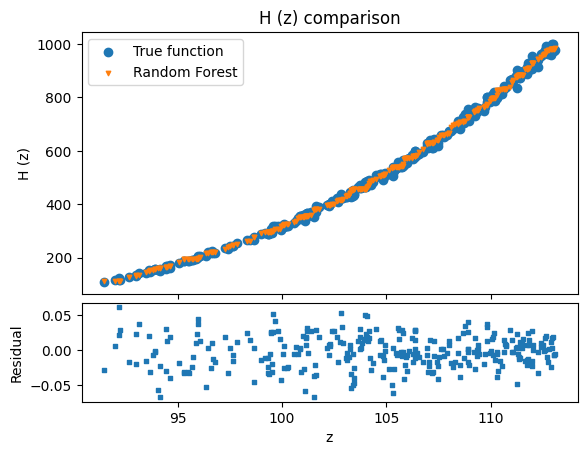

In [ ]:
#Plot
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax1 = fig.add_subplot(gs[0:5,0])
plt.title('H (z) comparison')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_rf, marker = 'v', s = 10, label = 'Random Forest')
plt.legend()
plt.ylabel('H (z)')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_rf/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('z')

#### 4.5.3 All together

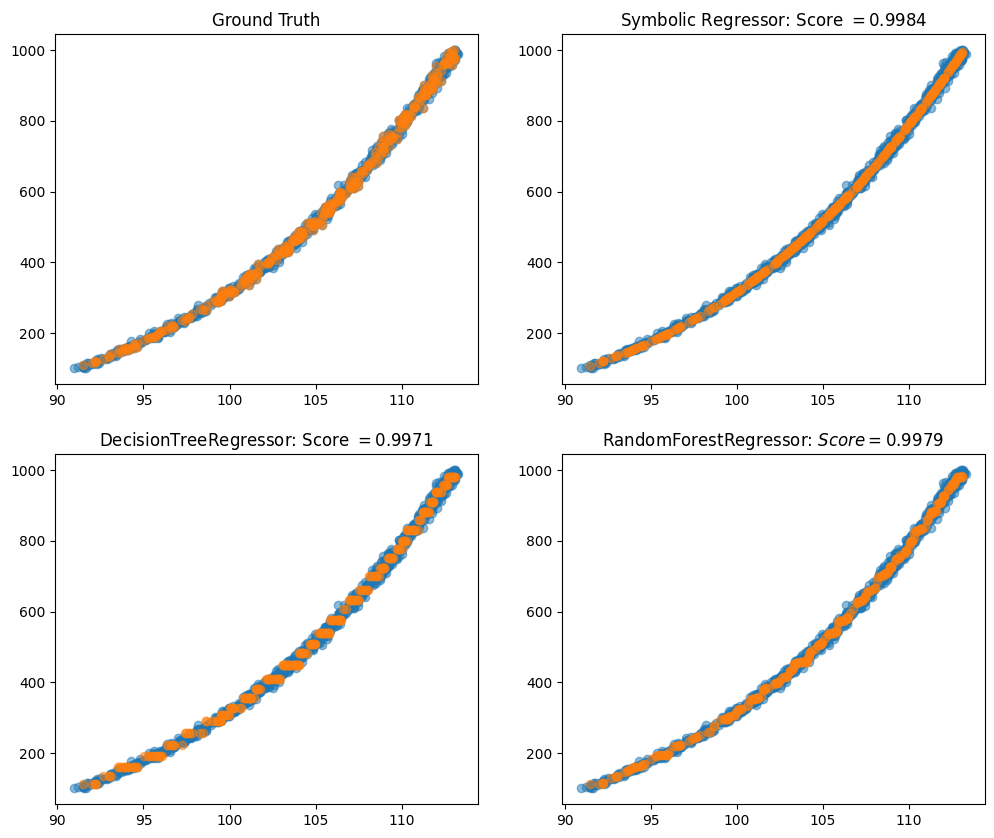

In [ ]:
fig = plt.figure(figsize=(12, 10))
for i, (y, score, title) in enumerate([(y_test, None, "Ground Truth"),
                                       (y_gp, score_gp1, r"Symbolic Regressor: Score $= {:.4f}$".format(score_gp1)),
                                       (y_tree, score_tree, r"DecisionTreeRegressor: Score $= {:.4f}$".format(score_tree)),
                                       (y_rf, score_rf, r"RandomForestRegressor: $Score = {:.4f}$".format(score_rf))]):
    ax = fig.add_subplot(2, 2, i+1)
    points = ax.scatter(X, y_true, alpha=0.5)
    test = ax.scatter(X_test,y, alpha=0.5)
    plt.title(title)